In [534]:
import os
import pandas as pd
import datetime
from datetime import timedelta
import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [520]:
def to_eod(df):
    return df.loc[df.groupby(['Ticker', 'TradeCategory', 'eventDateTime', 'tradeDate','id'])['tradeTime'].idxmax()]

In [482]:
# load and preprocess

os.chdir('S:\Jon Soll\TradeLog')
tradelog = pd.read_excel('Tradelog.xlsx')

mask =  (tradelog['Date'] >= pd.Timestamp(datetime.date(2018, 5, 1))) & \
        (tradelog['Closed Position'] == 1) & \
        (tradelog['Result for Stock'].isin([1, -1])) & \
        (~tradelog['EventTime'].isna()) & \
        (~tradelog['TradeCategory'].isna())
variables = ['Date', 'EventTime', 'Ticker', 'TradeCategory', 'Result for Stock']

df = tradelog[mask]
df = df[variables]

df.loc[df['EventTime'] == "BMO", 'EventTime'] = datetime.time(8, 30)
df.loc[df['EventTime'] == "AMC", 'EventTime'] = datetime.time(16, 30)
df['EventDateTime'] = [datetime.datetime.combine(date, time) for (date, time) in zip(df['Date'], df['EventTime'])]
df = df.drop_duplicates()
df['id'] = np.arange(len(df)) + 1
print(df.shape)
df.head(30)

(164, 7)


Date EventTime  Ticker         TradeCategory Result for Stock  \
107 2018-05-01  13:59:00    AXSM  INSTITUTION DECISION               -1   
110 2018-05-01  11:05:00     GSM                   ITC                1   
129 2018-05-02  15:44:00    NVRO  INSTITUTION DECISION               -1   
130 2018-05-03  09:43:00    ABBV  INSTITUTION DECISION                1   
132 2018-05-03  08:30:00    AMGN          FDA DECISION                1   
140 2018-05-03  08:30:00   BIIB           FDA DECISION                1   
141 2018-05-03  08:30:00    EGRX           SHARED DRUG                1   
142 2018-05-03  16:30:00    FLXN         REIMBURSEMENT                1   
144 2018-05-03  16:30:00    HALO         REIMBURSEMENT                1   
145 2018-05-03  16:30:00    IRWD            SETTLEMENT                1   
146 2018-05-03  16:30:00    JAZZ         REIMBURSEMENT                1   
158 2018-05-04  13:18:00    GILD  INSTITUTION DECISION                1   
159 2018-05-07  08:30:00    AMAG         REIMBURSEMENT               -1   
164 2018-05-07  08:30:00    HRTX         REIMBURSEMENT                1   
171 2018-05-07  08:30:00  MOR GY         REIMBURSEMENT                1   
173 2018-05-07  08:30:00    ONCE         REIMBURSEMENT                1   
177 2018-05-08  08:30:00    ALXN       PATENT ISSUANCE               -1   
180 2018-05-08  09:42:00    CELG  INSTITUTION DECISION                1   
185 2018-05-08  10:01:00    IDCC                 OTHER                1   
190 2018-05-08  10:01:00     VHC                 OTHER                1   
191 2018-05-08  10:46:00    VIVE  INSTITUTION DECISION               -1   
205 2018-05-09  08:30:00    COOL         REIMBURSEMENT                1   
207 2018-05-09  14:53:00    FSLR        COURT DECISION                1   
208 2018-05-09  08:30:00    IART         REIMBURSEMENT                1   
209 2018-05-09  08:30:00    MDXG         REIMBURSEMENT               -1   
210 2018-05-09  08:30:00    PACB            SETTLEMENT                1   
211 2018-05-09  08:30:00    PCRX         REIMBURSEMENT               -1   
214 2018-05-09  08:30:00   RHHBY         REIMBURSEMENT               -1   
220 2018-05-09  14:53:00    SPWR        COURT DECISION                1   
222 2018-06-07  16:30:00    ACOR        COURT DECISION                1   

          EventDateTime  id  
107 2018-05-01 13:59:00   1  
110 2018-05-01 11:05:00   2  
129 2018-05-02 15:44:00   3  
130 2018-05-03 09:43:00   4  
132 2018-05-03 08:30:00   5  
140 2018-05-03 08:30:00   6  
141 2018-05-03 08:30:00   7  
142 2018-05-03 16:30:00   8  
144 2018-05-03 16:30:00   9  
145 2018-05-03 16:30:00  10  
146 2018-05-03 16:30:00  11  
158 2018-05-04 13:18:00  12  
159 2018-05-07 08:30:00  13  
164 2018-05-07 08:30:00  14  
171 2018-05-07 08:30:00  15  
173 2018-05-07 08:30:00  16  
177 2018-05-08 08:30:00  17  
180 2018-05-08 09:42:00  18  
185 2018-05-08 10:01:00  19  
190 2018-05-08 10:01:00  20  
191 2018-05-08 10:46:00  21  
205 2018-05-09 08:30:00  22  
207 2018-05-09 14:53:00  23  
208 2018-05-09 08:30:00  24  
209 2018-05-09 08:30:00  25  
210 2018-05-09 08:30:00  26  
211 2018-05-09 08:30:00  27  
214 2018-05-09 08:30:00  28  
220 2018-05-09 14:53:00  29  
222 2018-06-07 16:30:00  30

In [524]:
os.chdir('P:\Projects\event_analysis')
import IntradayPrice2
importlib.reload(IntradayPrice2)
from IntradayPrice2 import request_price_data

In [626]:
# pull data from Bloomberg

# df = df[:50]
tickers        = df['Ticker']
eventDatetimes = df['EventDateTime']

interval = 1
num_days = 1
data = pd.concat(request_price_data(tickers, eventDatetimes, num_days=num_days, interval = interval))
data['tradeDate'] = [d.date() for d in data['tradeTime']]

Usage: ipykernel_launcher.py [options]

ipykernel_launcher.py: error: no such option: -f




Connecting to localhost:8194

1/164:  Pulling data for event that happened at 2018-05-01 13:59:00 with AXSM
2/164:  Pulling data for event that happened at 2018-05-01 11:05:00 with GSM
3/164:  Pulling data for event that happened at 2018-05-02 15:44:00 with NVRO
4/164:  Pulling data for event that happened at 2018-05-03 09:43:00 with ABBV
5/164:  Pulling data for event that happened at 2018-05-03 08:30:00 with AMGN
6/164:  Pulling data for event that happened at 2018-05-03 08:30:00 with BIIB 
7/164:  Pulling data for event that happened at 2018-05-03 08:30:00 with EGRX
8/164:  Pulling data for event that happened at 2018-05-03 16:30:00 with FLXN
Error: 'time'
9/164:  Pulling data for event that happened at 2018-05-03 16:30:00 with HALO
Error: 'time'
10/164:  Pulling data for event that happened at 2018-05-03 16:30:00 with IRWD
Error: 'time'
11/164:  Pulling data for event that happened at 2018-05-03 16:30:00 with JAZZ
Error: 'time'
12/164:  Pulling data for event that happened at 201

102/164:  Pulling data for event that happened at 2018-08-03 08:30:00 with TEVA
103/164:  Pulling data for event that happened at 2018-08-06 10:18:00 with NE
104/164:  Pulling data for event that happened at 2018-08-07 08:30:00 with SOBI
Error: 'time'
105/164:  Pulling data for event that happened at 2018-08-07 14:19:00 with VHC
106/164:  Pulling data for event that happened at 2018-08-08 10:00:00 with AGN
107/164:  Pulling data for event that happened at 2018-08-09 08:30:00 with MNTA
108/164:  Pulling data for event that happened at 2018-08-09 08:30:00 with UTHR
109/164:  Pulling data for event that happened at 2018-08-13 11:15:00 with ENDP
110/164:  Pulling data for event that happened at 2018-08-14 08:30:00 with MTSI
111/164:  Pulling data for event that happened at 2018-08-15 12:01:00 with AGN
112/164:  Pulling data for event that happened at 2018-08-20 14:54:00 with AMGN
113/164:  Pulling data for event that happened at 2018-08-28 16:30:00 with ASRT
Error: 'time'
114/164:  Pulling

In [627]:
# combine metadata and price data
df_comb = data.merge(df[['Ticker', 'EventDateTime', 'Result for Stock', 'TradeCategory', 'id']],
           left_on=['Ticker', 'eventDateTime'], right_on=['Ticker', 'EventDateTime'])

# get EOD prices 
variables = ['id', 'Ticker', 'EventDateTime', 'TradeCategory', 'Result for Stock', 'tradeDate', 'tradeTime', 'close']
df_timeseries = to_eod(df_comb)[variables]
df_timeseries = df_comb[variables]

# get prices at time of event
df_eventPrice = df_comb.loc[df_comb.groupby(['id'])['tradeTime'].idxmin()][['id', 'close']]
df_eventPrice.columns = ['id', 'eventPrice']

# calculate returns
df_ret = df_timeseries.merge(df_eventPrice, left_on = 'id', right_on = 'id')
df_ret['return'] = (df_ret['close'] - df_ret['eventPrice']) / df_ret['eventPrice']
df_ret['t_min'] = (df_ret.groupby('id')['tradeTime'].rank(method='min') * interval - interval) 
df_ret['t_hr'] = (df_ret.groupby('id')['tradeTime'].rank(method='min') * interval - interval) / 60
# df_ret['t'] = [str(timedelta(minutes=x))[:-3] for x in df_ret['t']]

# df_ret.loc[df_ret.groupby(['tradeDate', 'id'])['tradeTime'].idxmax()].sort_values(by=['id', 'tradeDate'])
# df_ret.loc[df_ret.groupby(['tradeDate', 'id'])['tradeTime'].idxmin()].sort_values(by=['id', 'tradeDate'])
# df_ret

In [628]:
df_ret[df_ret.id == 4]

id Ticker       EventDateTime         TradeCategory Result for Stock  \
300   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
301   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
302   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
303   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
304   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
305   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
306   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
307   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
308   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
309   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
310   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
311   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
312   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
313   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
314   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
315   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
316   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
317   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
318   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
319   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
320   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
321   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
322   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
323   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
324   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
325   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
326   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
327   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
328   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
329   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
..   ..    ...                 ...                   ...              ...   
649   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
650   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
651   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
652   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
653   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
654   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
655   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
656   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
657   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
658   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
659   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
660   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
661   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
662   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
663   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
664   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
665   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
666   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
667   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
668   4   ABBV 2018-05-03 09:43:00  INSTITUTION DECISION                1   
6

In [614]:
def time_diff(ts):
    diff = ts.diff() #/ np.timedelta64(1, 'm')
    return pd.concat([ts, diff], axis = 1)

In [615]:
time_diff(df_ret.tradeTime[0:70])

tradeTime tradeTime
0  2018-05-01 13:59:00       NaT
1  2018-05-01 14:14:00  00:15:00
2  2018-05-01 14:29:00  00:15:00
3  2018-05-01 14:44:00  00:15:00
4  2018-05-01 14:59:00  00:15:00
5  2018-05-01 15:14:00  00:15:00
6  2018-05-01 15:29:00  00:15:00
7  2018-05-01 15:44:00  00:15:00
8  2018-05-01 15:59:00  00:15:00
9  2018-05-01 16:29:00  00:30:00
10 2018-05-02 09:30:00  17:01:00
11 2018-05-02 09:45:00  00:15:00
12 2018-05-02 10:00:00  00:15:00
13 2018-05-02 10:15:00  00:15:00
14 2018-05-02 10:30:00  00:15:00
15 2018-05-02 10:45:00  00:15:00
16 2018-05-02 11:00:00  00:15:00
17 2018-05-02 11:15:00  00:15:00
18 2018-05-02 11:30:00  00:15:00
19 2018-05-02 11:45:00  00:15:00
20 2018-05-02 12:00:00  00:15:00
21 2018-05-02 12:15:00  00:15:00
22 2018-05-02 12:30:00  00:15:00
23 2018-05-02 12:45:00  00:15:00
24 2018-05-02 13:00:00  00:15:00
25 2018-05-02 13:15:00  00:15:00
26 2018-05-02 13:30:00  00:15:00
27 2018-05-02 13:45:00  00:15:00
28 2018-05-02 14:00:00  00:15:00
29 2018-05-02 14:15:00  00:15:00
..                 ...       ...
40 2018-05-03 10:15:00  00:15:00
41 2018-05-03 10:30:00  00:15:00
42 2018-05-03 10:45:00  00:15:00
43 2018-05-03 11:00:00  00:15:00
44 2018-05-03 11:15:00  00:15:00
45 2018-05-03 11:30:00  00:15:00
46 2018-05-03 11:45:00  00:15:00
47 2018-05-03 12:00:00  00:15:00
48 2018-05-03 12:15:00  00:15:00
49 2018-05-03 12:30:00  00:15:00
50 2018-05-03 12:45:00  00:15:00
51 2018-05-03 13:00:00  00:15:00
52 2018-05-03 13:15:00  00:15:00
53 2018-05-03 13:30:00  00:15:00
54 2018-05-03 13:45:00  00:15:00
55 2018-05-03 14:00:00  00:15:00
56 2018-05-03 14:15:00  00:15:00
57 2018-05-03 14:30:00  00:15:00
58 2018-05-03 14:45:00  00:15:00
59 2018-05-03 15:00:00  00:15:00
60 2018-05-03 15:15:00  00:15:00
61 2018-05-03 15:30:00  00:15:00
62 2018-05-03 15:45:00  00:15:00
63 2018-05-03 16:15:00  00:30:00
64 2018-05-04 09:30:00  17:15:00
65 2018-05-04 09:45:00  00:15:00
66 2018-05-04 10:00:00  00:15:00
67 2018-05-04 10:15:00  00:15:00
68 2018-05-04 10:30:00  00:15:00
69 2018-05-04 10:45:00  00:15:00

[70 rows x 2 columns]

In [559]:
def conf(gb, pct = 0.9):
    mean = gb['return'].mean()
    count = gb['id'].count()
    sem = gb['return'].sem()
    conf = sem * scipy.stats.t.ppf((1 + pct) / 2., count-1)
    return conf.fillna(0)

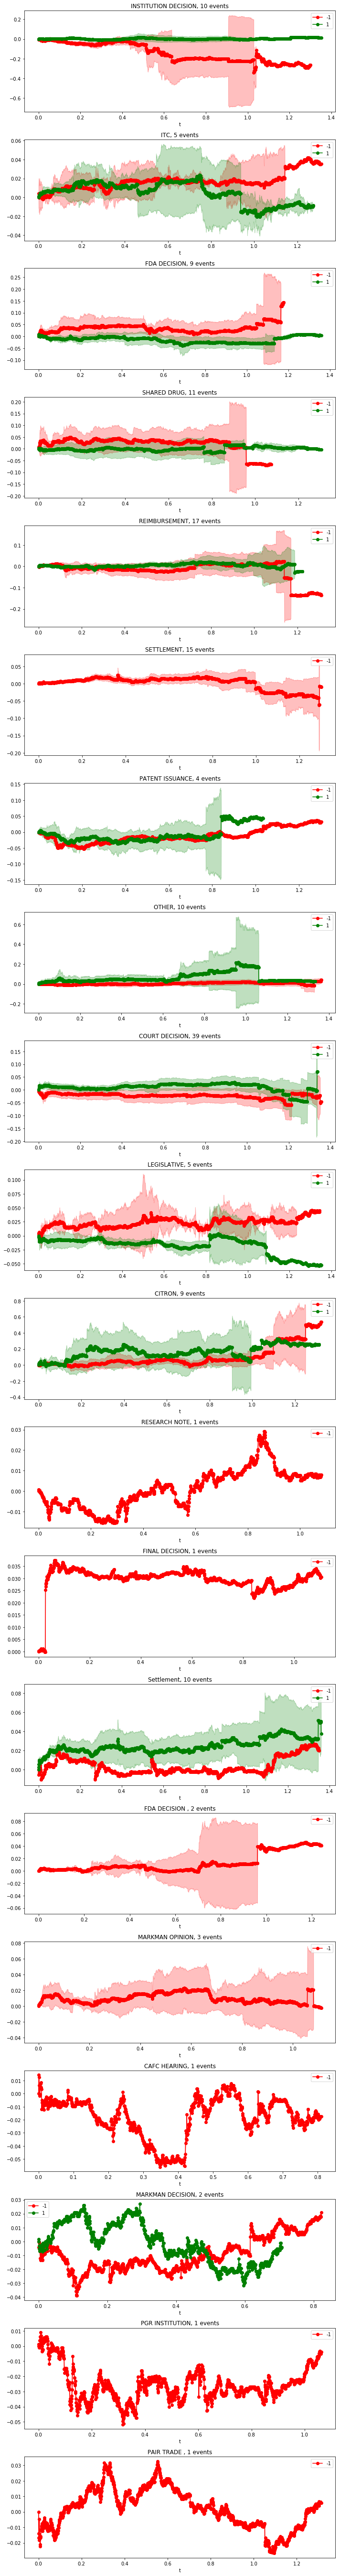

In [576]:
fig, axes = plt.subplots(nrows = len(df_ret['TradeCategory'].unique()), ncols=1, figsize=(10, 75))
colors = {'-1': 'r', '1': 'g'}
for ax, tc in zip(axes.flatten(), df_ret['TradeCategory'].unique()):
    df_tc = df_ret[df_ret['TradeCategory'] == tc]
    gb = df_tc.groupby(['Result for Stock', 't'])
    
    conf_int = conf(gb, pct=0.75)
    mean = gb['return'].mean() 

    try:
        mean_plot = mean.unstack(level = 0).iloc[:,0]
        mean_plot.plot(marker='o', ax=ax, label = '-1', color = 'r') # plot the means
        
        conf_plot = conf_int.unstack(level = 0).iloc[:,0]
        conf_upper = conf_plot + mean_plot
        conf_lower = mean_plot - conf_plot
        
        ax.fill_between(mean_plot.index, mean_plot.values, conf_upper.values, color='r', alpha=0.25)
        ax.fill_between(mean_plot.index, conf_lower.values, mean_plot.values, color='r', alpha=0.25)
        
    except:
        print("%s: No data for '-1'" % tc)
        pass
    try:
        mean_plot = mean.unstack(level = 0).iloc[:,1]
        mean_plot.plot(marker='o', ax=ax, label = '1', color = 'g') # plot the means
        
        conf_plot = conf_int.unstack(level = 0).iloc[:,1]
        conf_upper = conf_plot + mean_plot
        conf_lower = mean_plot - conf_plot
        
        ax.fill_between(mean_plot.index, mean_plot.values, conf_upper.values, color='g', alpha=0.25)
        ax.fill_between(mean_plot.index, conf_lower.values, mean_plot.values, color='g', alpha=0.25)
        
    except:
        pass
    
    ax.set_autoscaley_on(True)
    ax.legend(loc='best')
    ax.set_title('%s, %d events' % (tc, len(df_tc.id.unique())))
plt.tight_layout()

In [557]:
df[df['TradeCategory'] == 'SHARED DRUG']

Date EventTime  Ticker TradeCategory Result for Stock  \
141 2018-05-03  08:30:00    EGRX   SHARED DRUG                1   
240 2018-05-17  16:30:00    ALDR   SHARED DRUG                1   
323 2018-05-30  16:30:00    VRTX   SHARED DRUG               -1   
461 2018-07-17  08:30:00  BTG LN   SHARED DRUG                1   
474 2018-07-17  08:30:00     GE9   SHARED DRUG                1   
478 2018-07-18  08:30:00    LGND   SHARED DRUG                1   
482 2018-07-18  08:30:00    MNTA   SHARED DRUG               -1   
509 2018-07-25  08:30:00    INVA   SHARED DRUG                1   
525 2018-07-26  08:30:00    IRWD   SHARED DRUG                1   
528 2018-07-27  08:30:00    ENTA   SHARED DRUG                1   
576 2018-08-08  10:00:00     AGN   SHARED DRUG                1   
577 2018-08-09  08:30:00    MNTA   SHARED DRUG               -1   

          EventDateTime   id  
141 2018-05-03 08:30:00    7  
240 2018-05-17 16:30:00   34  
323 2018-05-30 16:30:00   48  
461 2018-07-17 08:30:00   82  
474 2018-07-17 08:30:00   83  
478 2018-07-18 08:30:00   85  
482 2018-07-18 08:30:00   86  
509 2018-07-25 08:30:00   90  
525 2018-07-26 08:30:00   94  
528 2018-07-27 08:30:00   96  
576 2018-08-08 10:00:00  106  
577 2018-08-09 08:30:00  107